In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig
import glob
from IPython.display import display
import os
import sys
from datetime import date
import json
import numpy as np

In [3]:
os.getcwd()

'D:\\Studium\\Bachelorarbeit\\gaze_tool_interaction\\code'

### Set defaults here

In [4]:
DATA_PATH = '../Pilot_Data'
PROCESSED_DATA_PATH = '../ProcessedData/'
PLOT_PATH = '../PLOTS/data_quality/'
RESULTS = '../PLOTS/results/'
os.makedirs(os.path.dirname(PROCESSED_DATA_PATH), exist_ok=True)
os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

### Read data .json files as pandas dataframe

In [4]:
files = glob.glob(f'{DATA_PATH}/sub*/JSon*')
display(files)

['../Pilot_Data\\sub_02\\JSon02_block1.json',
 '../Pilot_Data\\sub_02\\JSon02_block2.json',
 '../Pilot_Data\\sub_02\\JSon02_block3.json',
 '../Pilot_Data\\sub_02\\JSon02_block4.json',
 '../Pilot_Data\\sub_02\\JSon02_block5.json',
 '../Pilot_Data\\sub_02\\JSon02_block6.json',
 '../Pilot_Data\\sub_03\\JSon03_block1.json',
 '../Pilot_Data\\sub_03\\JSon03_block2.json',
 '../Pilot_Data\\sub_03\\JSon03_block3.json',
 '../Pilot_Data\\sub_03\\JSon03_block4.json',
 '../Pilot_Data\\sub_03\\JSon03_block5.json',
 '../Pilot_Data\\sub_03\\JSon03_block6.json',
 '../Pilot_Data\\sub_04\\JSon04_block1.json',
 '../Pilot_Data\\sub_04\\JSon04_block2.json',
 '../Pilot_Data\\sub_04\\JSon04_block3.json',
 '../Pilot_Data\\sub_04\\JSon04_block4.json',
 '../Pilot_Data\\sub_04\\JSon04_block5.json',
 '../Pilot_Data\\sub_04\\JSon04_block6.json',
 '../Pilot_Data\\sub_05\\JSon05_block1.json',
 '../Pilot_Data\\sub_05\\JSon05_block2.json',
 '../Pilot_Data\\sub_05\\JSon05_block3.json',
 '../Pilot_Data\\sub_05\\JSon05_bl

In [17]:
samples_df = pd.DataFrame()
meta_df = pd.DataFrame()

for fi in files: # reading only one file for now
    with open(fi, 'r') as j:
        tmp = json.loads(j.read())
    tmpdf = pd.DataFrame()
    subID = tmp['experiment']['participantNr']
    blockID = tmp['experiment']['blocks'][0]['ID']
#     tmpdf['subjectID'] =  subID
#     tmpdf['gender'] = tmp['experiment']['gender']
#     tmpdf['age'] = tmp['experiment']['age']
    meta_df = pd.concat([meta_df, pd.DataFrame({'subjectID':[subID], 
                                   'gender':[tmp['experiment']['gender']], 
                                   'age': [tmp['experiment']['age']]
                                               }
                                              )
                        ], 
                        ignore_index=True)
#     meta_df = meta_df.append(tmpdf)
    #display(meta_df)

#     for nT, trial in enumerate(tmp['experiment']['blocks'][0]['trials']):
#         tmpdf = pd.io.json.json_normalize(data=trial['framedata'], sep='_')
#         tmpdf['timeStamp'] = pd.to_datetime(tmpdf['timeStamp'], unit='s')  
#         tmpdf['subjectID'] = subID
#         tmpdf['blockID'] = blockID
#         tmpdf['trialID']=nT
#         tmpdf['cue'] = trial['cue']
#         tmpdf['tool'] = trial['toolModel']
#         tmpdf['orientation'] = trial['toolOrientation']
#         tmpdf['trialDuration'] = trial['end'] - trial['start']
#         tmpdf['cueDuration'] = trial['cueEnd'] - trial['cueStart']
#         samples_df = pd.concat([samples_df, tmpdf], ignore_index=True)


    
meta_df = meta_df.drop_duplicates(subset=['subjectID'], keep='first')
meta_df.set_index('subjectID')
samples_df['trialID'] = 24*(samples_df['blockID'] - 1) + samples_df['trialID']
samples_df.to_csv(f'{PROCESSED_DATA_PATH}/00_ET_samples.csv', index=False)
meta_df.to_csv(f'{PROCESSED_DATA_PATH}/00_participant_meta.csv', index=False)
#display(tmpdf)
display(meta_df)

,subjectID,gender,age
0,2,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


,subjectID,gender,age
0,2,F,22
1,2,F,22
2,2,F,22
3,2,F,22
4,2,F,22
5,2,F,22
6,3,F,22
7,3,F,22
8,3,F,22
9,3,F,22


KeyError: 'blockID'

#### To skip reading from JSon files again, read from csv file created above

In [ ]:
samples_df = pd.read_csv(f'{PROCESSED_DATA_PATH}/00_ET_samples.csv')

#### Clean out duplicates and save cleaned dataframe

In [52]:
samples_df = samples_df.drop_duplicates(subset=['timeStamp'], keep='first')
samples_df.to_csv(f'{PROCESSED_DATA_PATH}/00_ET_samples_noDuplicates.csv',
                  index=False)

In [18]:
# To skip the cells above, load the csv file without duplicates here
samples_df = pd.read_csv(f'{PROCESSED_DATA_PATH}/00_ET_samples_noDuplicates.csv')

In [6]:
samples_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615308 entries, 0 to 615307
Data columns (total 59 columns):
timeStamp                         615308 non-null object
tobiiTimeStamp                    615308 non-null float64
isLeftBlinkingW                   615308 non-null bool
isRightBlinkingW                  615308 non-null bool
isLeftBlinkingL                   615308 non-null bool
isRightBlinkingL                  615308 non-null bool
hitObjectName                     576482 non-null object
triggerPressed                    615308 non-null bool
hmdPos_x                          615308 non-null float64
hmdPos_y                          615308 non-null float64
hmdPos_z                          615308 non-null float64
eyePosWorld_x                     615308 non-null float64
eyePosWorld_y                     615308 non-null float64
eyePosWorld_z                     615308 non-null float64
eyeDirWorld_x                     615308 non-null float64
eyeDirWorld_y                     61

In [6]:
display(samples_df.blockID.unique())
display(samples_df.trialID.unique())
display(samples_df.subjectID.unique())
display(samples_df.hitObjectName.unique())
display(samples_df.tool.unique())

array([1, 2, 3, 4, 5, 6], dtype=int64)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143], dtype=int64)

array([2, 3, 4, 5, 6, 7, 8], dtype=int64)

array(['Cube', 'Floor', 'Table', 'Wall (2)', 'CueCollider', nan,
       'ForkLeftEffector', 'ForkLeftHandle', 'PaletteknifeLeftHandle',
       'PaletteknifeLeftEffector', 'FischschupperLeftEffector',
       'FischschupperLeftHandle', 'finger_ring_1_r', 'finger_index_1_r',
       'UnkrautstecherLeftHandle', 'ShovelRightEffector',
       'ShovelRightHandle', 'ScrewdriverLeftHandle',
       'ScrewdriverLeftEffector', 'BlumenschneiderLeftEffector',
       'BlumenschneiderLeftHandle', 'UnkrautstecherLeftEffector',
       'SpatulaRightHandle', 'Sphere', 'ShovelLeftHandle',
       'ShovelLeftEffector', 'ScrewdriverRightEffector',
       'ScrewdriverRightHandle', 'Sphere (1)',
       'ZitronenschaberLeftHandle', 'ZitronenschaberLeftEffector',
       'SpeichenschluesselRightEffector', 'SpeichenschluesselRightHandle',
       'thumb_distal', 'PaintbrushLeftEffector', 'PaintbrushLeftHandle',
       'WrenchRightHandle', 'WrenchRightEffector', 'Sphere (2)',
       'SpatulaRightEffector', 'WrenchLeft

array(['fork', 'paletteknife', 'fish descaler', 'daisy grubber', 'shovel',
       'screwdriver', 'flower-cutter', 'spatula', 'zester',
       'spoke wrench', 'paintbrush', 'wrench'], dtype=object)

In [8]:
samples_df.columns

Index(['timeStamp', 'tobiiTimeStamp', 'isLeftBlinkingW', 'isRightBlinkingW',
       'isLeftBlinkingL', 'isRightBlinkingL', 'hitObjectName',
       'triggerPressed', 'hmdPos_x', 'hmdPos_y', 'hmdPos_z', 'eyePosWorld_x',
       'eyePosWorld_y', 'eyePosWorld_z', 'eyeDirWorld_x', 'eyeDirWorld_y',
       'eyeDirWorld_z', 'eyePosLocal_x', 'eyePosLocal_y', 'eyePosLocal_z',
       'eyeDirLocal_x', 'eyeDirLocal_y', 'eyeDirLocal_z',
       'hmdDirectionForward_x', 'hmdDirectionForward_y',
       'hmdDirectionForward_z', 'hmdDirectionRight_x', 'hmdDirectionRight_y',
       'hmdDirectionRight_z', 'hmdRotation_x', 'hmdRotation_y',
       'hmdRotation_z', 'hmdDirectionUp_x', 'hmdDirectionUp_y',
       'hmdDirectionUp_z', 'hitPointOnObject_x', 'hitPointOnObject_y',
       'hitPointOnObject_z', 'hitObjectCenterInWorld_x',
       'hitObjectCenterInWorld_y', 'hitObjectCenterInWorld_z',
       'controllerTransform_instanceID', 'controllerPosition_x',
       'controllerPosition_y', 'controllerPosition_z', 

#### Standardize tool names and create a column for familiarity

In [19]:
#map object names as written in hitObjectName column : this helps to remove handle like below
toolNames = {'fork':'Fork','paletteknife':'Paletteknife', 
             'fish descaler':'Fischschupper','daisy grubber':'Unkrautstecher',
             'shovel':'Shovel','screwdriver':'Screwdriver', 
             'flower-cutter':'Blumenschneider','spatula':'Spatula', 
             'zester':'Zitronenschaber','spoke wrench':'Speichenschluessel',
             'paintbrush':'Paintbrush','wrench':'Wrench'}

samples_df['tool'] = samples_df['tool'].map(toolNames)

# method to assign familiarity value to each tool
def familiarityCheck(tool):
    familiartools = ['Fork','Shovel','Screwdriver','Spatula',
                     'Paintbrush','Wrench']
    
    if tool in familiartools:
        return 'familiar'
    else:
        return 'unfamiliar'
    
# call familiarity check method to create Familiarity column in samples_df
samples_df['Familiarity'] = samples_df.tool.apply(familiarityCheck)

### Tidy up column 'hitToolPart' and leave only 'Handle' and 'Effector'

In [20]:
'''get last 8 characters of hitobjectname and map the handle as below.
This gives us which part of the tool is fixated on
'''
samples_df['hitToolPart'] = samples_df.hitObjectName.str[-8:]


In [7]:
samples_df.hitToolPart.unique()

array(['Cube', 'Floor', 'Table', 'Wall (2)', 'Collider', nan, 'Effector',
       'ftHandle', 'ring_1_r', 'ndex_1_r', 'htHandle', 'Sphere',
       'here (1)', 'b_distal', 'here (2)', 'here (3)', 'ring_2_r',
       'ndex_0_r', 'ddle_1_r', 'ndex_2_r', 'ddle_2_r', 'ddle_0_r',
       'inky_2_r', 'Wall (1)', 'inky_1_r', 'Wall'], dtype=object)

In [21]:
# map proper 'Handle' or 'Effector' name to all the fixations on the tools 
# and ignore the rest of the hit objects 
samples_df.hitToolPart = (samples_df.hitToolPart.map({'ftHandle':'Handle', 
                                               'htHandle':'Handle',
                                               'Effector':'Effector'}
                                              , na_action='ignore'))

In [10]:
samples_df.hitToolPart.unique()

array([nan, 'Effector', 'Handle'], dtype=object)

### Create timestamp in DateTime format, set it as index and use it to <br> calculate time from start of trial, trial duration and framerate

In [22]:
#copy timestamp in unix format and turn it to datetime
samples_df['timestamp_dt'] = samples_df.timeStamp
samples_df.timestamp_dt = pd.to_datetime(samples_df.timestamp_dt)
samples_df.set_index('timestamp_dt', inplace=True)

In [23]:
samples_df.index

DatetimeIndex(['2020-03-03 14:10:21.918417454',
               '2020-03-03 14:10:21.934372425',
               '2020-03-03 14:10:21.954322577',
               '2020-03-03 14:10:21.965354443',
               '2020-03-03 14:10:21.987304688',
               '2020-03-03 14:10:21.998291016',
               '2020-03-03 14:10:22.021206617',
               '2020-03-03 14:10:22.032177447',
               '2020-03-03 14:10:22.043148279',
               '2020-03-03 14:10:22.056254625',
               ...
               '2020-03-10 11:18:27.808563232',
               '2020-03-10 11:18:27.831502438',
               '2020-03-10 11:18:27.853443861',
               '2020-03-10 11:18:27.901315212',
               '2020-03-10 11:18:27.917334318',
               '2020-03-10 11:18:27.918270350',
               '2020-03-10 11:18:27.937219381',
               '2020-03-10 11:18:27.949187040',
               '2020-03-10 11:18:27.969195604',
               '2020-03-10 11:18:27.992072821'],
              dtype=

In [24]:
#create column which keeps track of time elapsed since trial start
samples_df['timeFromStart'] = (samples_df
#                                    .reset_index()
                                   .groupby(['subjectID', 'trialID'], as_index=False)
#                                    .timestamp_dt
                                   .transform(lambda x: 
                                              (x.index - x.index[0])/np.timedelta64(1,'s'))
                                   .timeStamp
                                  )

In [25]:
# Create Column that keps track of trial duration of  each trial
samples_df['trialDuration'] = (samples_df
#                                    .reset_index()
                                   .groupby(['subjectID', 'trialID'], as_index=False)
#                                    .timestamp_dt
                                   .transform(lambda x: 
                                              (x.index[-1] - x.index[0])/np.timedelta64(1,'s'))
                                   .timeStamp
                                  )

Text(0.5, 1.0, 'Trial Duration')

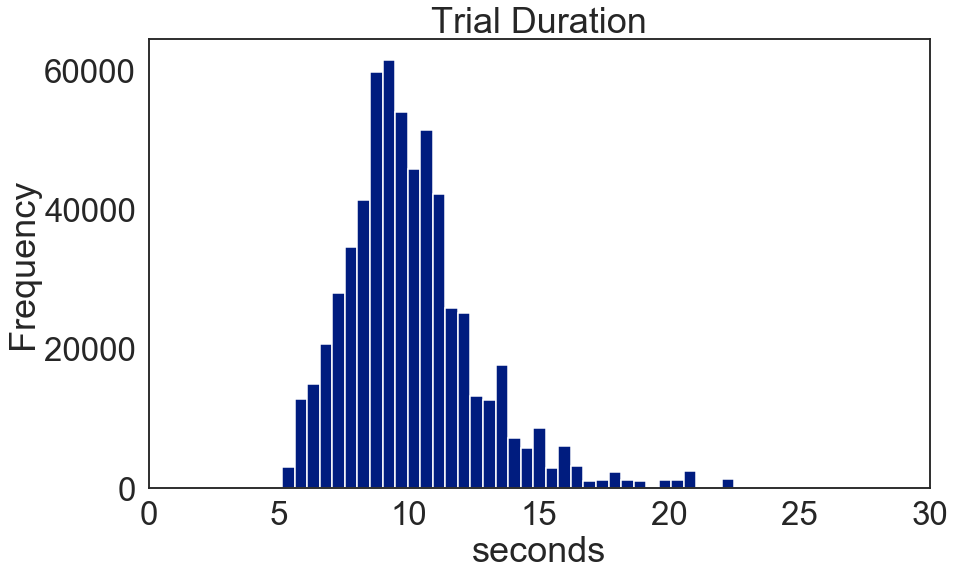

In [34]:
ax = samples_df.trialDuration.plot(kind='hist', bins=100)
ax.set_xlabel('seconds')
plt.xlim(0,30)
plt.title('Trial Duration')

# plt.savefig(f'{PLOT_PATH}/trialDuration.png',
#              bbox_inches='tight', quality=90)

,count,mean,std,min,25%,50%,75%,max
subjectID,,,,,,,,
2,144.0,62.031817,3.248504,56.940322,60.327454,61.362543,62.820982,78.027382
3,144.0,63.567859,2.125863,58.825005,62.508380,63.329822,64.392199,76.330413
4,144.0,65.169342,1.965174,60.499332,63.768559,64.879196,66.545307,71.592771
5,144.0,65.551072,2.357342,61.178899,64.111919,65.304615,66.399023,75.948419
6,144.0,65.407777,2.488851,50.325931,64.054914,65.260962,66.505759,74.884851
7,144.0,62.215929,2.047168,55.272944,60.574700,62.295413,63.864483,66.629375
8,144.0,61.601708,1.280543,58.541470,60.833833,61.556290,62.259682,66.374141


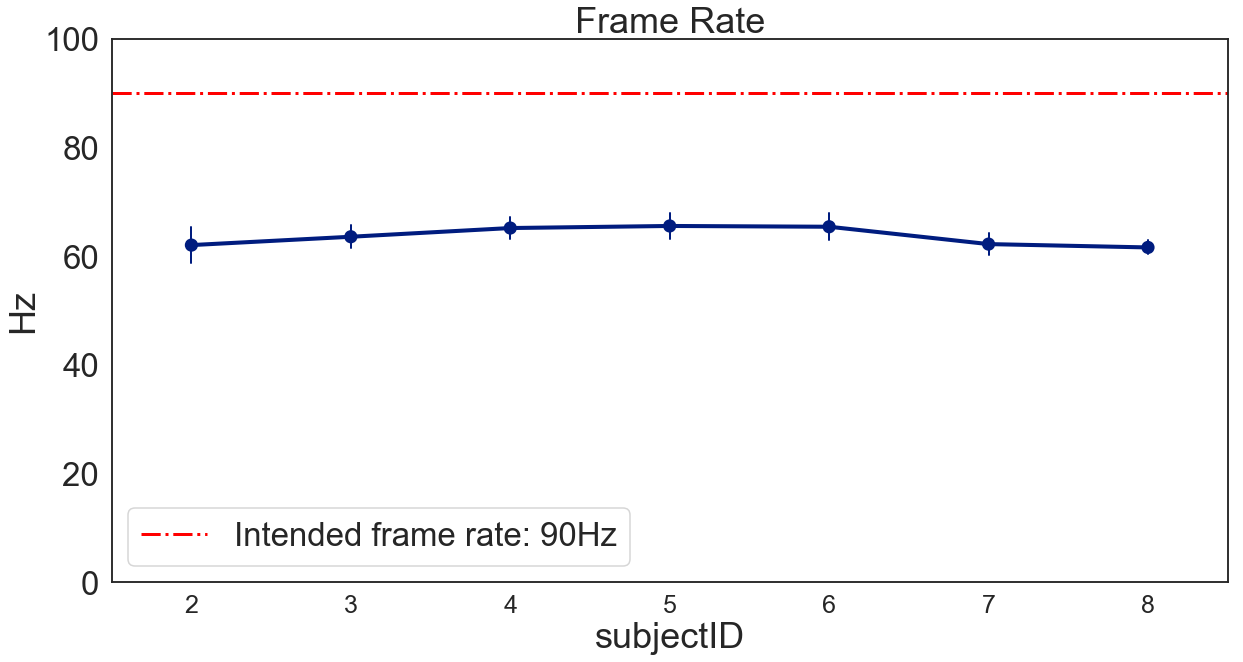

In [33]:
samples_df.reset_index()
#show framerate over subjects
tmpdf = (
    samples_df
#     .drop_duplicates(subset=['timeStamp'], keep='first')
    .sort_values(['subjectID', 'trialID'])
    .reset_index()
    .groupby(['subjectID','trialID'])['timestamp_dt']    
    .apply(lambda x: 1/np.mean(
        (x-x.shift())
        /np.timedelta64(1, 's')
    )
          )
    .rename('Frame Rate')
    .reset_index()
)
display(tmpdf.groupby('subjectID')['Frame Rate'].describe())
framerates_df = tmpdf.groupby('subjectID')['Frame Rate'].describe()

sns.set(context = "talk", style="white", palette="dark", 
        font_scale=2, rc={'figure.figsize':(14,8.27)})

#sns.set(style="white", palette="dark",font_scale=2.5, context = 'paper')

_, ax = plt.subplots(1,1,figsize=(20,10))
sns.pointplot(data=tmpdf, x='subjectID', y='Frame Rate', color='b',
              errwidth=2, capsize=0, saturation=0.5,ci='sd')
ax.set_ylabel("Hz")
ax.set_ylim(0,100)
line = ax.axhline(y=90, ls='-.', color='red', lw=3,
                          label='Intended frame rate: 90Hz')
plt.legend(handles=[line])
plt.xticks(rotation=0, fontsize=25)
plt.title('Frame Rate')
plt.savefig(f'{PLOT_PATH}/frameRatesDottedLine.png',
                 transparent=True, bbox_inches='tight', quality=90)

### Calculate angles and then velocities from eye and head directions 

In [30]:
# Calculate head & eye angles
# read up on arctan
samples_df['eye_theta_h'] = np.arctan2(samples_df['eyeDirLocal_x'], 
                                       samples_df['eyeDirLocal_z'])
samples_df['eye_theta_v'] = np.arctan2(samples_df['eyeDirLocal_y'], 
                                       samples_df['eyeDirLocal_z'])

samples_df['head_theta_h'] = np.arctan2(samples_df['hmdDirectionForward_x'], 
                                        samples_df['hmdDirectionForward_z'])
samples_df['head_theta_v'] = np.arctan2(samples_df['hmdDirectionForward_y'],
                                        samples_df['hmdDirectionForward_z'])

In [31]:
# Calculate head & eye velocity
samples_df['eye_vel_h'] = (samples_df
                                .groupby(['subjectID','trialID'])
                                .eye_theta_h
                                .apply(lambda x: x.diff())
                          )/(samples_df
                                .groupby(['subjectID','trialID'])
                                .timeFromStart
                                .apply(lambda x: x.diff()))

samples_df['eye_vel_v'] = (samples_df
                                .groupby(['subjectID','trialID'])
                                .eye_theta_v
                                .apply(lambda x: x.diff())
                          )/(samples_df
                                .groupby(['subjectID','trialID'])
                                .timeFromStart
                                .apply(lambda x: x.diff()))

samples_df['head_vel_h'] = (samples_df
                                .groupby(['subjectID','trialID'])
                                .head_theta_h
                                .apply(lambda x: x.diff())
                          )/(samples_df
                                .groupby(['subjectID','trialID'])
                                .timeFromStart
                                .apply(lambda x: x.diff()))

samples_df['head_vel_v'] = (samples_df
                                .groupby(['subjectID','trialID'])
                                .head_theta_v
                                .apply(lambda x: x.diff())
                          )/(samples_df
                                .groupby(['subjectID','trialID'])
                                .timeFromStart
                                .apply(lambda x: x.diff()))


In [32]:
samples_df['eye_angular_vel'] =np.sqrt(samples_df.eye_vel_h**2 + samples_df.eye_vel_v**2)
samples_df['head_angular_vel'] =np.sqrt(samples_df.head_vel_h**2 + samples_df.head_vel_v**2)

In [52]:
# save the samples_df with velocities and angles to a csv file called 01_ET_samples_velocity
samples_df.to_csv(f'{PROCESSED_DATA_PATH}/01_ET_samples_velocity.csv', index=False)

In [12]:
samples_df = pd.read_csv(f'{PROCESSED_DATA_PATH}/01_ET_samples_velocity.csv')

In [48]:
# #Code to resample the data if it's needed later on
# samples_df = (samples_df
#               .set_index('timestamp_dt')
#               .groupby(['subjectID', 'trialID'])
#               .resample('0.016667S',loffset=0.016667, convention='s').fillna('ffill') 
#              )

# samples_df.drop(columns=['subjectID', 'trialID'],
#             inplace=True)

# samples_df = samples_df.reset_index()

### check distribution of head vs eye velocity for combined, <br>horizontal and vertical velocity

In [13]:
# Drop all nan values from head and eye velocity estimates
samples_df.dropna(axis=0,subset=['eye_angular_vel', 'eye_vel_h', 
                                 'head_angular_vel', 'head_vel_h'],inplace=True)

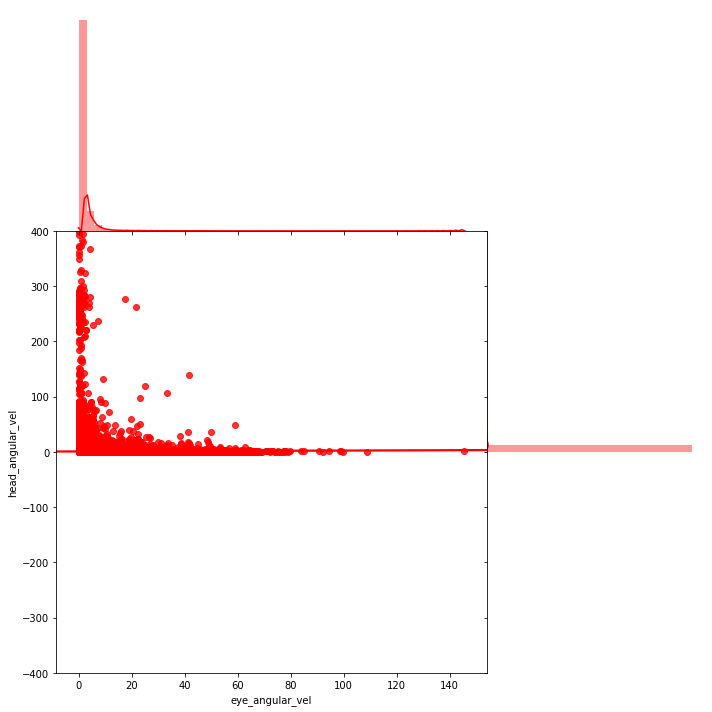

In [14]:
#combined head vs eye velocity
g = sns.jointplot(x= samples_df.eye_angular_vel, y=samples_df.head_angular_vel, 
                  space=0,color='r', kind="reg", height=10,
                  ratio=2, ylim=(-400, 400)
                 )

#plt.savefig(PLOT_PATH+'/velocities.png', quality=90)

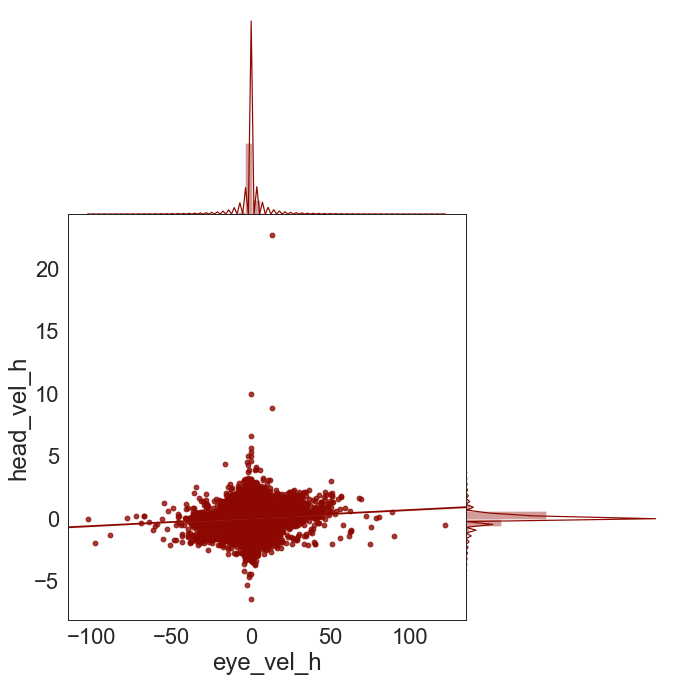

In [98]:
# horizontal head vs eye velocity
g = sns.jointplot(x= samples_df.eye_vel_h, y=samples_df.head_vel_h, 
                  space=0,color='r', kind="reg", height=10,
                  ratio=2, 
                 )

#plt.savefig(PLOT_PATH+'/h_velocities.png', quality=90)

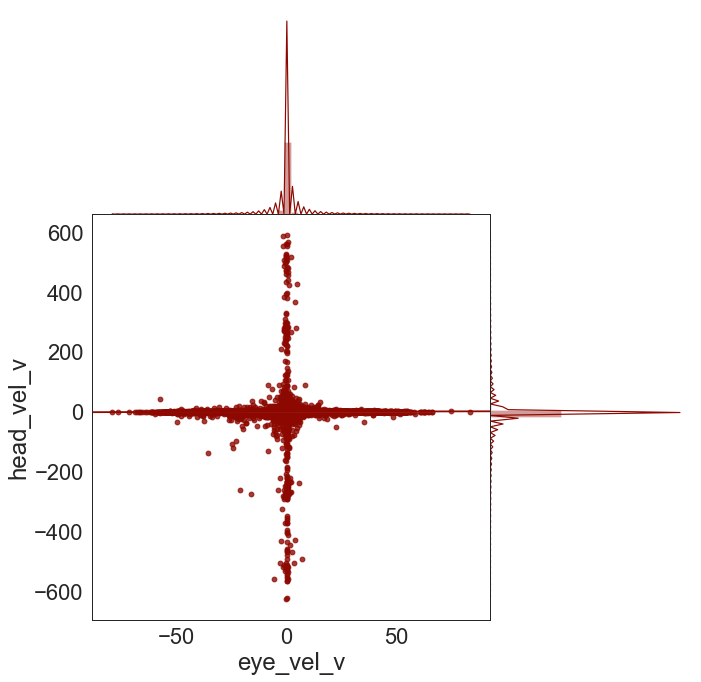

In [99]:
# vertical head vs eye velocity
g = sns.jointplot(x= samples_df.eye_vel_v, y=samples_df.head_vel_v, 
                  space=0,color='r', kind="reg", height=10,
                  ratio=2, 
                 )

#plt.savefig(PLOT_PATH+'/v_velocities.png', quality=90)

# Fixations

### Create functions for calculating Median Absolute Deviation

In [47]:
def med_filt(x,samples=3):
    return pd.Series(ss.medfilt(x,samples))

def simple_mad(angular_vel, thresh = 5):
#     th_1 = np.median(angular_vel)
    if len(angular_vel.shape) == 1:
        angular_vel = angular_vel[:,None]
    median = np.median(angular_vel)
    diff = (angular_vel - median)**2
    diff = np.sqrt(diff)
#    print(diff)
    med_abs_deviation = np.median(diff)
    saccade_thresh = median + thresh*med_abs_deviation
    return saccade_thresh

def at_mad(angular_vel, th_0=200):
    threshs = []
    if len(angular_vel.shape) == 1:
        angular_vel = angular_vel[:,None]
    while True:
        threshs.append(th_0)
        angular_vel = angular_vel[angular_vel < th_0]         
        median = np.median(angular_vel)
        diff = (angular_vel - median)**2
        diff = np.sqrt(diff)
        med_abs_deviation = np.median(diff)
        th_1 = median + 3*1.48*med_abs_deviation
#         print(th_0, th_1)
        if (th_0 - th_1)>1:            
            th_0 = th_1
        else:
            saccade_thresh = th_1
            threshs.append(saccade_thresh)
            break
#     return threshs
    return saccade_thresh

### Plot eye and head angular velocity over time

In [46]:
#Plotting every 10th trial for each subject to see distributon of eye angular velocity
#call the atmad function and draw the lines for the atmad threshold, 
#this will be a good data quality check
kind='scatter'
for subjectID in samples_df.subjectID.unique():
    for trialID in samples_df.trialID.unique()[::10]:        
        tmpdf = samples_df.query('subjectID==@subjectID and trialID==@trialID')
        mad_1 = at_mad(tmpdf.eye_angular_vel)
        mad_2 = at_mad(tmpdf.head_angular_vel)
        _, ax = plt.subplots(2, 1, figsize=(20,12), sharex=False, sharey=False)
        ax = ax.ravel()

        (tmpdf
         .plot(x='timeFromStart',y='eye_angular_vel', kind=kind, color='g', ax=ax[0],
               label='Eye Angular Vel', legend=True)
        )
        line = ax[0].axhline(mad_1, ls='-', color='red', lw=2,
                          label='at_mad threshold')
        plt.legend(handles=[line])
        ax[0].set_xlim(0,10)
        
        (tmpdf
         .plot(x='timeFromStart',y='head_angular_vel',kind=kind, color='r', ax=ax[1], 
               label='Head Angular Vel', legend=True)
        )
        line = ax[1].axhline(mad_2, ls='-', color='red', lw=2,
                          label='at_mad threshold')
        plt.legend(handles=[line])
        ax[1].set_xlim(0,10)
        
        plt.savefig(f'{PLOT_PATH}/EyeVelocities/eye_head_vel_{subjectID}_{trialID}.png',transparent=True, bbox_inches='tight', quality=90)
        plt.close('all')

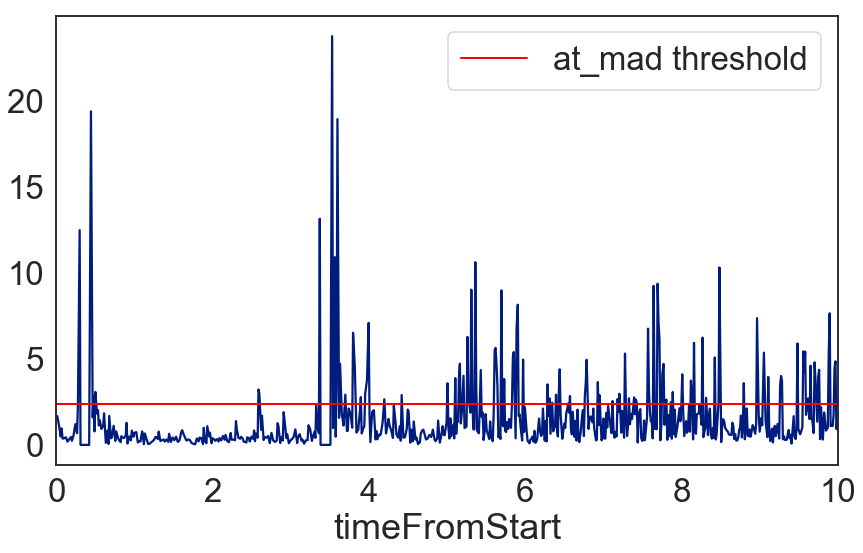

In [46]:
tmpdf = samples_df.query('subjectID==5 and trialID==10')
mad_1 = at_mad(tmpdf.eye_angular_vel)

(tmpdf.plot(x='timeFromStart',y='eye_angular_vel', kind='line', color='b',
            label='Eye Angular Vel', legend=True))
line = plt.axhline(mad_1, ls='-', color='red', lw=2,label='at_mad threshold')
plt.legend(handles=[line])
plt.xlim(0,10)
plt.savefig(f'{PLOT_PATH}/saccades_atMADSub5Trial10.png',transparent=True, bbox_inches='tight', quality=90)

TypeError: 'AxesSubplot' object is not subscriptable

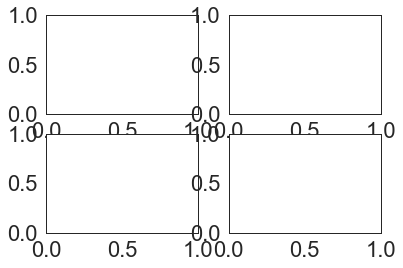

In [51]:
fig, axs = plt.subplots(2, 2)
for i in [0,1,2,3]:
    j = 10
    tmpdf = samples_df.query('subjectID==5 and trialID==@j')
    mad_1 = at_mad(tmpdf.eye_angular_vel)

    (tmpdf.plot(x='timeFromStart',y='eye_angular_vel', kind='line', color='b',
            label='Eye Angular Vel', ax = ax[i], legend=True))
    line = ax[i].axhline(mad_1, ls='-', color='red', lw=2,label='at_mad threshold')
    ax[i].legend(handles=[line])
    ax[i].xlim(0,10)
    j *= 2


In [21]:
# plot 12 trials per subject and put them all in 1 figure, so 1 fig per 1 sujbect
# call at_mad function to draw a horizontal line at the fixation threshold
for subjectID in samples_df.subjectID.unique():
    fig = plt.figure(figsize=(40,25))
    fig.suptitle(f'Adaptive thresholds for saccade detection subject {subjectID}',
                 fontsize=40, y=0.98)
    i = 1
    for trialID in samples_df.trialID.unique()[::12]:
        ax = fig.add_subplot(6,2,i)
        tmpdf = samples_df.query('subjectID==@subjectID and trialID==@trialID')
        mad_1 = at_mad(tmpdf.eye_angular_vel)
        (tmpdf
         .plot(x='timeFromStart',y='eye_angular_vel', kind='line', color='b',
               ax=ax, label='Eye Angular Vel', legend=False)
        )
        ax.set_ylabel('Eye Angular Velocity')
        ax.set_title(f'Trial {trialID}')
        ax.set_xlim(0,10)
        ax.set_ylim(0,30)
        line = ax.axhline(mad_1, ls='-', color='red', lw=2,
                          label='at_mad threshold')
        plt.legend(handles=[line])
        i+=1
    fig.tight_layout(pad=3.0)
    plt.savefig(f'{PLOT_PATH}/EyeVelocities/eye_vel_threshold{subjectID}.png',
                 transparent=True, bbox_inches='tight', quality=90)
    plt.close('all')

### Use at_mad function to decide whether a sample contains a fixation or a saccade

In [51]:
samples_df['isFix'] = 0
samples_df['isFix'] = (samples_df
                       .groupby(['subjectID', 'trialID'],
                                as_index=False)
                       .eye_angular_vel
                       .transform(lambda x: x < at_mad(x))
                      )
display(samples_df['isFix'].value_counts())
display(samples_df['isFix'].value_counts(normalize=True))

True     515793
False     98507
Name: isFix, dtype: int64

True     0.839643
False    0.160357
Name: isFix, dtype: float64

In [20]:
samples_df.head()

,timeStamp,tobiiTimeStamp,isLeftBlinkingW,isRightBlinkingW,isLeftBlinkingL,isRightBlinkingL,hitObjectName,triggerPressed,hmdPos_x,hmdPos_y,...,eye_theta_v,head_theta_h,head_theta_v,eye_vel_h,eye_vel_v,head_vel_h,head_vel_v,eye_angular_vel,head_angular_vel,isFix
timestamp_dt,,,,,,,,,,,,,,,,,,,,,
2020-03-03 14:10:21.934372425,2020-03-03 14:10:21.934372425,92.661469,False,False,False,False,Floor,True,59.806953,111.138611,...,-0.363754,-0.955044,-0.307481,0.578143,0.129368,-0.101947,0.048004,0.592440,0.112683,True
2020-03-03 14:10:21.954322577,2020-03-03 14:10:21.954322577,92.679977,False,False,False,False,Floor,True,59.811569,111.140045,...,-0.361221,-0.957509,-0.305405,0.455382,0.126974,-0.123568,0.104051,0.472752,0.161541,True
2020-03-03 14:10:21.965354443,2020-03-03 14:10:21.965354443,92.691093,False,False,False,False,Floor,True,59.814671,111.141747,...,-0.361692,-0.959040,-0.303584,-0.061125,-0.042702,-0.138762,0.165018,0.074563,0.215606,True
2020-03-03 14:10:21.987304688,2020-03-03 14:10:21.987304688,92.713226,False,False,False,False,Floor,True,59.817936,111.147697,...,-0.363031,-0.962292,-0.299084,-0.422613,-0.060997,-0.148173,0.205017,0.426993,0.252957,True
2020-03-03 14:10:21.998291016,2020-03-03 14:10:21.998291016,92.724388,False,False,False,False,Floor,True,59.818928,111.151527,...,-0.362376,-0.964093,-0.296267,-0.096335,0.059626,-0.163896,0.256468,0.113294,0.304364,True


### Calculate the fixation durations and identify outliers in fixations and saccades

In [52]:
samples_df['fix_duration'] = (samples_df
                              .groupby(['subjectID', 'blockID',
                                        'trialID'],
                                       as_index=False).isFix
                              .apply(lambda x: 
                                     x.groupby((x != x.shift()).cumsum())
                                     .transform(lambda x: 
                                                (x.index[-1] - x.index[0]
                                                )/np.timedelta64(1, 's')
                                               )
                                    )
                             ).reset_index().set_index('timestamp_dt').isFix

In [55]:
samples_df['isOutlierFix'] = (samples_df
                              .query('isFix == 1 and fix_duration != 0')
                              .fix_duration
                              .transform(lambda x: x > simple_mad(x, 3.5))
                             )

samples_df['isOutlierSac'] = (samples_df
                              .query('isFix == 0 and fix_duration != 0')
                              .fix_duration
                              .transform(lambda x: x > simple_mad(x, 3.5))
                             )

In [ ]:
display(samples_df['isOutlierFix'].value_counts(normalize=True))

In [ ]:
display(samples_df['isOutlierSac'].value_counts(normalize=True))

### Fixation durations with and without outliers

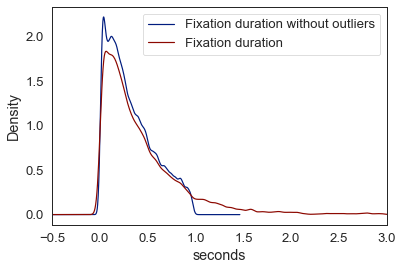

In [13]:
sns.set(style="white", palette="dark", font_scale=1.5, context = 'paper')

ax = (samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
      .fix_duration.plot(kind='kde', label='Fixation duration without outliers')
     )

(samples_df.query('isFix == 1 and fix_duration!=0').fix_duration
 .plot(kind='kde', ax = ax, color='r',label='Fixation duration')
)

ax.set_xlabel('seconds')
plt.legend()
plt.xlim((-0.5,3))
# plt.title('Fixation Duration')

plt.savefig(f'{PLOT_PATH}/FixationDurationOverlaid2.png',
            transparent=True, bbox_inches='tight', quality=90)

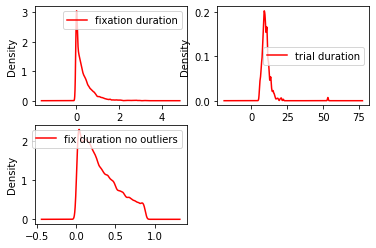

In [23]:
fig = plt.figure()
fig.add_subplot(2,2,1)
samples_df.fix_duration.plot.kde(color='r',label='fixation duration', legend=True)
fig.add_subplot(2,2,2)
samples_df.trialDuration.plot.kde(color='r',label='trial duration', legend=True)
fig.add_subplot(2,2,3)
(samples_df.loc[samples_df['isOutlierFix']==False].fix_duration.plot
 .kde(color='r',label='fix duration no outliers', legend=True)
)
# plt.savefig(f'{PLOT_PATH}/fixation_trial_durations.png',transparent=True, bbox_inches='tight', quality=90)

In [34]:
samples_df.fix_duration.describe()

count    614300.000000
mean          0.354793
std           0.420710
min           0.000000
25%           0.056883
50%           0.220410
75%           0.494297
max           3.215944
Name: fix_duration, dtype: float64

In [66]:
samples_df.to_csv(f'{PROCESSED_DATA_PATH}/02_ET_samples_fixations.csv', index=False)

In [5]:
samples_df = pd.read_csv(f'{PROCESSED_DATA_PATH}/02_ET_samples_fixations.csv')
#samples_df['timestamp_dt'] = samples_df.timeStamp
samples_df.set_index('timeStamp', inplace=True)
samples_df.head()
samples_df.rename(columns={"cue": "task"},inplace=True)

In [16]:
display(samples_df.columns)

Index(['tobiiTimeStamp', 'isLeftBlinkingW', 'isRightBlinkingW',
       'isLeftBlinkingL', 'isRightBlinkingL', 'hitObjectName',
       'triggerPressed', 'hmdPos_x', 'hmdPos_y', 'hmdPos_z', 'eyePosWorld_x',
       'eyePosWorld_y', 'eyePosWorld_z', 'eyeDirWorld_x', 'eyeDirWorld_y',
       'eyeDirWorld_z', 'eyePosLocal_x', 'eyePosLocal_y', 'eyePosLocal_z',
       'eyeDirLocal_x', 'eyeDirLocal_y', 'eyeDirLocal_z',
       'hmdDirectionForward_x', 'hmdDirectionForward_y',
       'hmdDirectionForward_z', 'hmdDirectionRight_x', 'hmdDirectionRight_y',
       'hmdDirectionRight_z', 'hmdRotation_x', 'hmdRotation_y',
       'hmdRotation_z', 'hmdDirectionUp_x', 'hmdDirectionUp_y',
       'hmdDirectionUp_z', 'hitPointOnObject_x', 'hitPointOnObject_y',
       'hitPointOnObject_z', 'hitObjectCenterInWorld_x',
       'hitObjectCenterInWorld_y', 'hitObjectCenterInWorld_z',
       'controllerTransform_instanceID', 'controllerPosition_x',
       'controllerPosition_y', 'controllerPosition_z', 'controllerRo

In [7]:
colliders_df = pd.read_csv(f'{PROCESSED_DATA_PATH}/00_ET_colliderInfo.csv')

In [ ]:
display(colliders_df)

# Results

### Fixations on Effector and Handle

In [6]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0 and hitToolPart!="Cue"')

tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')

# display(tmpdf)

tmpdf = tmpdf.groupby(['subjectID','trialID','tool','task','orientation',
                       'Familiarity','hitToolPart'])['isFix'].count()
tmpdf = tmpdf.groupby(level=[0,1]).apply(lambda x: x/float(x.sum()))
tmpdf = tmpdf.reset_index()
tmpdf = tmpdf.query('hitToolPart == "Effector"')
tmpdf['isFixOdds'] = tmpdf.isFix/(1 - tmpdf.isFix)
tmpdf['isFixLogOdds'] = np.log(tmpdf.isFix/(1 - tmpdf.isFix))
# tmpdf['isFixA'] = tmpdf.isFix
tmpdf.replace([np.inf, -np.inf], np.nan, inplace=True)
tmpdf.dropna(inplace=True)
display(tmpdf)

,subjectID,trialID,tool,task,orientation,Familiarity,hitToolPart,isFix,isFixOdds,isFixLogOdds
0,2,0,Fork,use,left,familiar,Effector,0.880000,7.333333,1.992430
2,2,1,Paletteknife,lift,left,unfamiliar,Effector,0.250000,0.333333,-1.098612
4,2,2,Fork,lift,left,familiar,Effector,0.333333,0.500000,-0.693147
6,2,3,Fischschupper,use,right,unfamiliar,Effector,0.789474,3.750000,1.321756
10,2,6,Fischschupper,use,left,unfamiliar,Effector,0.900000,9.000000,2.197225
...,...,...,...,...,...,...,...,...,...,...
1957,8,139,Screwdriver,use,right,familiar,Effector,0.318182,0.466667,-0.762140
1959,8,140,Paintbrush,use,left,familiar,Effector,0.607143,1.545455,0.435318
1961,8,141,Speichenschluessel,use,right,unfamiliar,Effector,0.318182,0.466667,-0.762140
1963,8,142,Blumenschneider,use,right,unfamiliar,Effector,0.526316,1.111111,0.105361


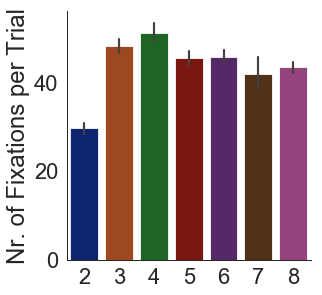

In [6]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0 and hitToolPart!="Cue"')

tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')

tmpdf = tmpdf.groupby(['subjectID','trialID'],
                      as_index=False)['isFix'].count()

sns.set(style="white", palette="dark",font_scale=2.5, context = 'paper')


g = (sns.catplot(data = tmpdf,
                legend = True,
                x = 'subjectID',
                y = 'isFix', 
                kind = 'bar'))

g.set_axis_labels("", "Nr. of Fixations per Trial")

plt.savefig(f'{RESULTS}/SubjectsFixations.png',transparent=True,
             bbox_inches='tight', quality=90)

,subjectID,trialID,isFix
0,2,0,43
1,2,1,22
2,2,2,18
3,2,3,35
4,2,4,22
...,...,...,...
1003,8,139,51
1004,8,140,48
1005,8,141,47
1006,8,142,49


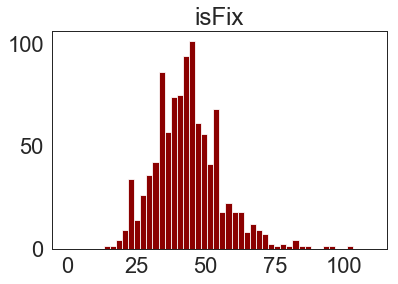

In [42]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
tmpdf = tmpdf.groupby(['subjectID','trialID'],
                      as_index=False)['isFix'].count()
display(tmpdf)

tmpdf.hist('isFix',bins=50,range=(0,110),color='darkred')
plt.grid(False)
plt.savefig(f'{RESULTS}/HistFixationsPerTrial.png',transparent=True,
             bbox_inches='tight', quality=90)

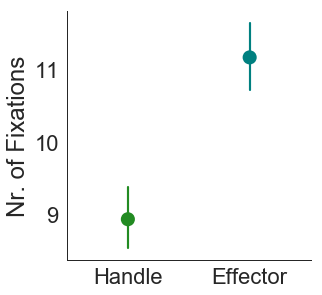

In [33]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0 and hitToolPart!="Cue"')

tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')

tmpdf = tmpdf.groupby(['subjectID','trialID','hitToolPart'],
                      as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'hitToolPart',
                 y = 'isFix', kind = 'point',
                 scale=2,dodge=0.1, order=['Handle', 'Effector'],
                 palette=['forestgreen', 'teal'],
                 height=5, aspect=1)
)
g.set_axis_labels("", "Nr. of Fixations")
plt.savefig(f'{RESULTS}/ToolPartOverall.png',transparent=True,
             bbox_inches='tight', quality=90)

# g = (sns.catplot(data = tmpdf,
#                  legend = True, x = 'hitToolPart',order=['Handle', 'Effector'],
#                  y = 'isFix', kind = 'bar', palette=sns.color_palette(
#                      ['forestgreen', 'teal']))
# )
# g.set_axis_labels("", "Nr. of Fixations")
# plt.savefig(f'{RESULTS}/ToolPartOverallBar.png',transparent=True,
#              bbox_inches='tight', quality=90)

# sns.set(style="white", palette="dark",font_scale=2.5, context = 'paper')

# ax = sns.boxenplot(data = tmpdf, x="hitToolPart", y="isFix",
#                    order=['Handle', 'Effector'], linewidth = 2.5, 
#                    palette=sns.color_palette(['forestgreen', 'teal']))

# ax.set_ylabel("Nr. of Fixations")
# ax.set_xlabel("")
# plt.savefig(f'{RESULTS}/ToolPartOverallBoxen.png',transparent=True,
#              bbox_inches='tight', quality=90)

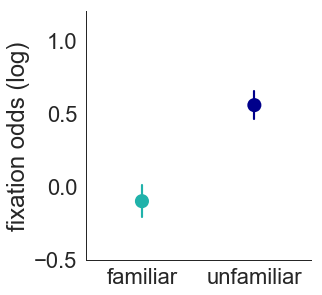

In [105]:
# tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
# tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
# tmpdf = tmpdf.groupby(['subjectID','trialID','hitToolPart'],
#                       as_index=False)['isFix'].count()

#plt.yticks([9,10,11])
# plt.savefig(f'{RESULTS}/fixCount_ToolPart_Poinplot.png',transparent=True,
#              bbox_inches='tight', quality=90)


# g = (sns.catplot(data = tmpdf,
#                  legend = True, x = 'hitToolPart',order=['Handle', 'Effector'],
#                  y = 'isFix', kind = 'bar', palette=sns.color_palette(
#                  ['green', 'blue']))
# )
# g.set_axis_labels("", "Number of fixations")
# plt.savefig(f'{RESULTS}/fixCount_ToolPart_Barplot.png',transparent=True,
#              bbox_inches='tight', quality=90)

# ax = sns.boxenplot(data = tmpdf, x="hitToolPart", y="isFix",
#                    order=['Handle', 'Effector'], palette=['green','blue'],
#                    linewidth = 2.5)
# ax.set_ylabel('Number of fixations')
# ax.set_ylim(0,40)
# plt.savefig(f'{RESULTS}/fixCount_ToolPart_Boxen.png',transparent=True,
#              bbox_inches='tight', quality=90)

### Fixations on effector and handle by factor *cue*

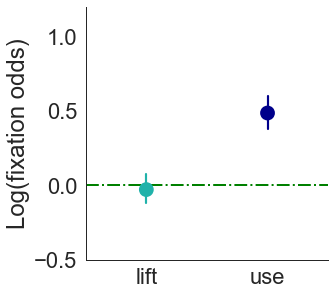

In [28]:
# tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0 and hitToolPart!="Cue"')
# tmpdf = tmpdf.groupby(['subjectID','trialID','task','hitToolPart'],
#                       as_index=False)['isFix'].count()

sns.set(style="white", palette="dark",font_scale=2.5, context = 'paper')

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'task',
                 y = 'isFixLogOdds', kind = 'point', ci=95,
                 scale=2.1,dodge=0.1, order=['lift', 'use'],
                # hue = 'task',
                 palette=['lightseagreen','darkblue'],
                 height=5, aspect=1, zorder=0.2)
)
# plt.ylim(-0.3,0.8)
plt.ylim(-0.5,1.2)
g.set_axis_labels("", "Log(fixation odds)")

plt.axhline(y=0, ls='-.', color='green', lw=2, zorder=0.1)
                          
# plt.savefig(f'{RESULTS}/OddsFixation_task_Pointplot.png',transparent=True,
#              bbox_inches='tight', quality=90)

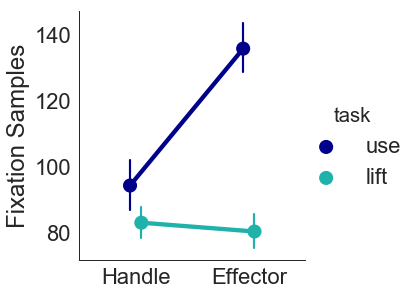

In [62]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0 and hitToolPart!="Cue"')
tmpdf = tmpdf.groupby(['subjectID','trialID','task','hitToolPart'],
                      as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'hitToolPart',
                 y = 'isFix', kind = 'point', ci=95,
                 scale=2,dodge=0.1, order=['Handle', 'Effector'],
                 hue = 'task', palette=['darkblue','lightseagreen'],
                 height=5, aspect=1)
)

g.set_axis_labels("", "Fixation Samples")

plt.savefig(f'{RESULTS}/FixSamplesTask.png',transparent=True,
             bbox_inches='tight', quality=90)

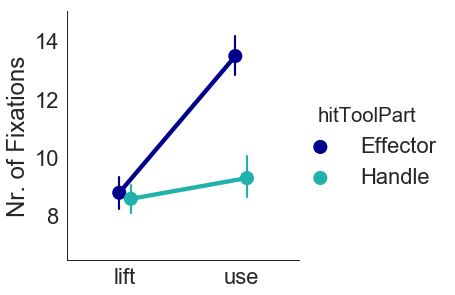

In [43]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0 and hitToolPart!="Cue"')
tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
tmpdf = tmpdf.groupby(['subjectID','trialID','task','hitToolPart'],as_index=False)['isFix'].count()
sns.set(style="white", palette="dark",font_scale=2.5, context = 'paper')

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'task',
                 y = 'isFix', kind = 'point', ci=95,
                 scale=2,dodge=0.1, order=['lift', 'use'],
                 hue = 'hitToolPart', palette=['darkblue','lightseagreen'],
                 height=5, aspect=1)
)
plt.ylim(6.5,15)
g.set_axis_labels("", "Nr. of Fixations")

plt.savefig(f'{RESULTS}/fixationCount_task_Pointplot.png',transparent=True,
             bbox_inches='tight', quality=90)

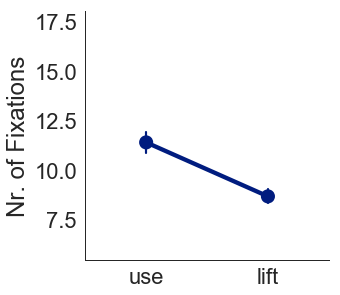

In [76]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0 and hitToolPart!="Cue"')
tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
tmpdf = tmpdf.groupby(['subjectID','trialID','task','hitToolPart'],as_index=False)['isFix'].count()
sns.set(style="white", palette="dark",font_scale=2.5, context = 'paper')

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'task',
                 y = 'isFix', kind = 'point', 
                 scale=2,ci=95)
)
plt.ylim(5.5,18)
g.set_axis_labels("", "Nr. of Fixations")

plt.savefig(f'{RESULTS}/fixationCount_taskMAIN.png',transparent=True,
             bbox_inches='tight', quality=90)

### Fixations on effector and handle by factor *orientation*

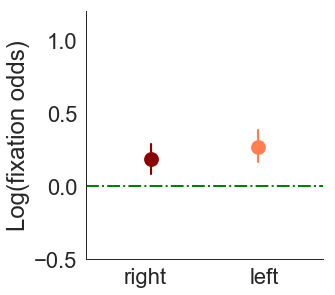

In [50]:
# tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
# tmpdf = tmpdf.groupby(['subjectID','trialID','orientation','hitToolPart'],
#                       as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'orientation',
                 y = 'isFixLogOdds', kind = 'point', ci=95,
                 scale=2.1,dodge=0.1, 
                 order=['right', 'left'],
                 hue = 'orientation', palette=['coral','darkred'],
                 height=5, aspect=1)
)
# plt.ylim(-0.3,0.8)
plt.ylim(-0.5,1.2)
g.set_axis_labels("", "Log(fixation odds)")

plt.axhline(y=0, ls='-.', color='green', lw=2)

plt.savefig(f'{RESULTS}/OddsFixations_orientation_Poinplot.png',
            transparent=True, bbox_inches='tight', quality=90)

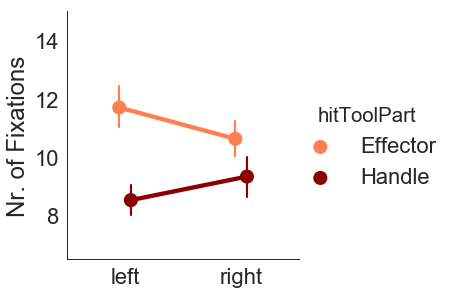

In [42]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
tmpdf = tmpdf.groupby(['subjectID','trialID','orientation','hitToolPart'],as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'orientation',
                 y = 'isFix', kind = 'point', ci=95,
                 scale=2,dodge=0.1, 
                 hue = 'hitToolPart', palette=['coral','darkred'],
                 height=5, aspect=1)
)
plt.ylim(6.5,15)
g.set_axis_labels("", "Nr. of Fixations")

plt.savefig(f'{RESULTS}/fixationCount_orientation_Pointplot.png',transparent=True,
             bbox_inches='tight', quality=90)

### Fixations on effector and handle by factor *familiarity*

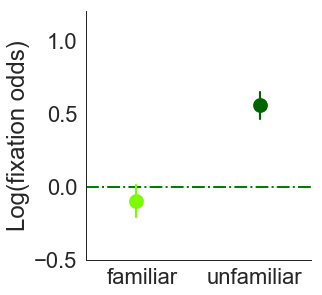

In [51]:
g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'Familiarity',
                 y = 'isFixLogOdds', kind = 'point',  ci=95,
                 scale=2.1,dodge=0.1, order=['familiar', 'unfamiliar'],
                 hue = 'Familiarity', palette=['lawngreen','darkgreen'],
                 height=5, aspect=1, zorder = 0.2)
)
# plt.ylim(-0.3,0.8)
plt.ylim(-0.5,1.2)
g.set_axis_labels("", "Log(fixation odds)")

plt.axhline(y=0, ls='-.', color='green', lw=2, zorder=0.1)
               
plt.savefig(f'{RESULTS}/OddsFixations_Familiarity_Pointplot.png',transparent=True,
             bbox_inches='tight', quality=90)

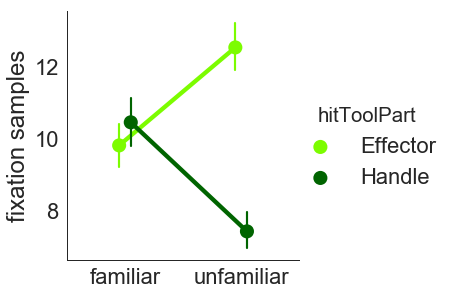

In [36]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
tmpdf = tmpdf.groupby(['subjectID','trialID','Familiarity','hitToolPart'],
                      as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'Familiarity',
                 y = 'isFix', kind = 'point',
                 scale=2,dodge=0.1, order=['familiar', 'unfamiliar'],
                 hue = 'hitToolPart', palette=['lawngreen','darkgreen'],
                 height=5, aspect=1)
)
g.set_axis_labels("", "fixation samples")

plt.savefig(f'{RESULTS}/fixations_familiarity_Poinplot.png',
            transparent=True, bbox_inches='tight', quality=90)

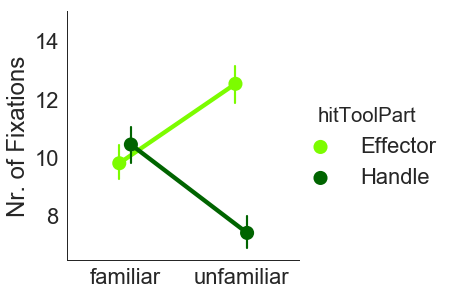

In [41]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
tmpdf = tmpdf.groupby(['subjectID','trialID','Familiarity','hitToolPart'],as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'Familiarity',
                 y = 'isFix', kind = 'point',
                 scale=2,dodge=0.1, order=['familiar', 'unfamiliar'],
                 hue = 'hitToolPart', palette=['lawngreen','darkgreen'],
                 height=5, aspect=1)
)
plt.ylim(6.5,15)
g.set_axis_labels("", "Nr. of Fixations")

plt.savefig(f'{RESULTS}/fixationCount_familiarity_Pointplot.png',transparent=True,
             bbox_inches='tight', quality=90)

### Interaction of factors *familiarity* and *task*

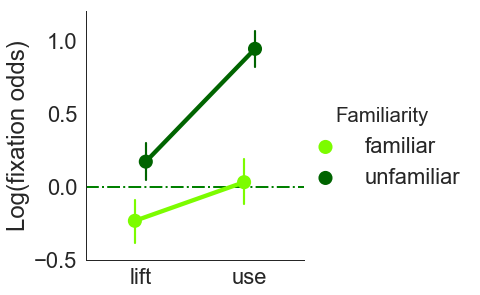

In [52]:
g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'task',
                 y = 'isFixLogOdds', kind = 'point', ci=95,
                 scale=2,dodge=0.1, order=['lift', 'use'],
                 hue = 'Familiarity', palette=['lawngreen','darkgreen'],
                 height=5, aspect=1,zorder=0.2)
)
plt.ylim(-0.5,1.2)

plt.savefig(f'{RESULTS}/OddsFixations_Interaction_FamiliarityTask.png',transparent=True,
             bbox_inches='tight', quality=90)

g.set_axis_labels("", "Log(fixation odds)")

plt.axhline(y=0, ls='-.', color='green', lw=2, zorder=0.1)

plt.savefig(f'{RESULTS}/OddsInteraction_Familiarity_Task.png',transparent=True,
             bbox_inches='tight', quality=90)

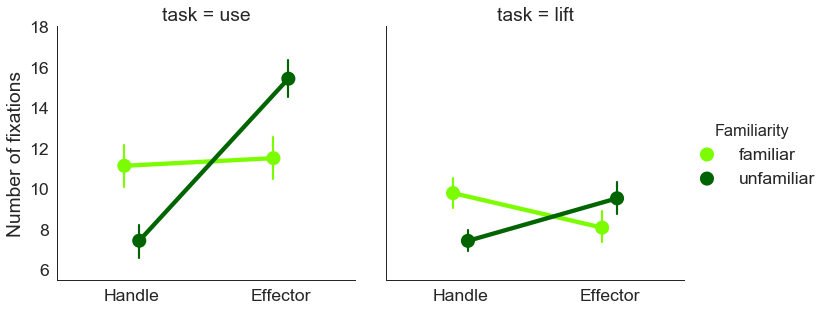

In [150]:
# tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
# tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
# tmpdf = tmpdf.groupby(['subjectID','trialID','Familiarity','task','hitToolPart'],as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'hitToolPart',
                 y = 'isFix',col='task', kind = 'point', ci=95,
                 scale=2,dodge=0.1, order=['Handle', 'Effector'],
                 hue = 'Familiarity', palette=['lawngreen','darkgreen'],
                 height=5, aspect=1)
)
plt.ylim(5.5,18)
g.set_axis_labels("", "Number of fixations")

plt.savefig(f'{RESULTS}/fixations_interaction_familiarity_cue_Poin.png',
            transparent=True, bbox_inches='tight', quality=90)

### Three-way interaction

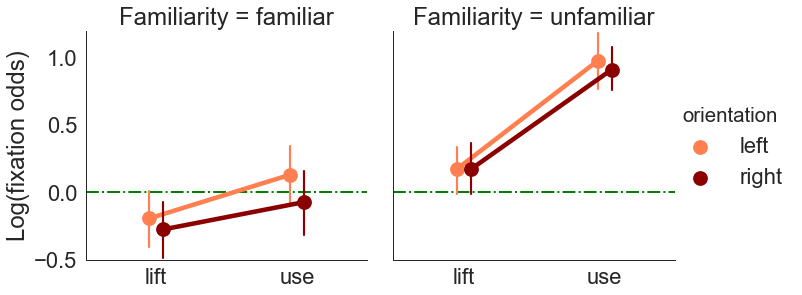

In [30]:
g = (sns.catplot(data = tmpdf,legend = True, x = 'task',
                 col = 'Familiarity', y = 'isFixLogOdds', 
                 kind = 'point', ci=95, scale=2.1, dodge=0.1,
                 order=['lift','use'],hue = 'orientation',
                 palette=['coral','darkred'], hight=5, aspect=1, zorder=0.2)
)
plt.ylim(-0.5,1.2)
g.set_axis_labels("", "fixation odds (log)")
plt.savefig(f'{RESULTS}/OddsFixations_3-wayInteraction.png',transparent=True,
             bbox_inches='tight', quality=90)

g.set_axis_labels("", "Log(fixation odds)")

ax1,ax2 = g.axes[0]

ax1.axhline(y=0, ls='-.', color='green', lw=2, zorder=0.1)
ax2.axhline(y=0, ls='-.', color='green', lw=2, zorder=0.1)

# plt.savefig(f'{RESULTS}/Odds3wayInteraction.png',transparent=True,
#              bbox_inches='tight', quality=90)

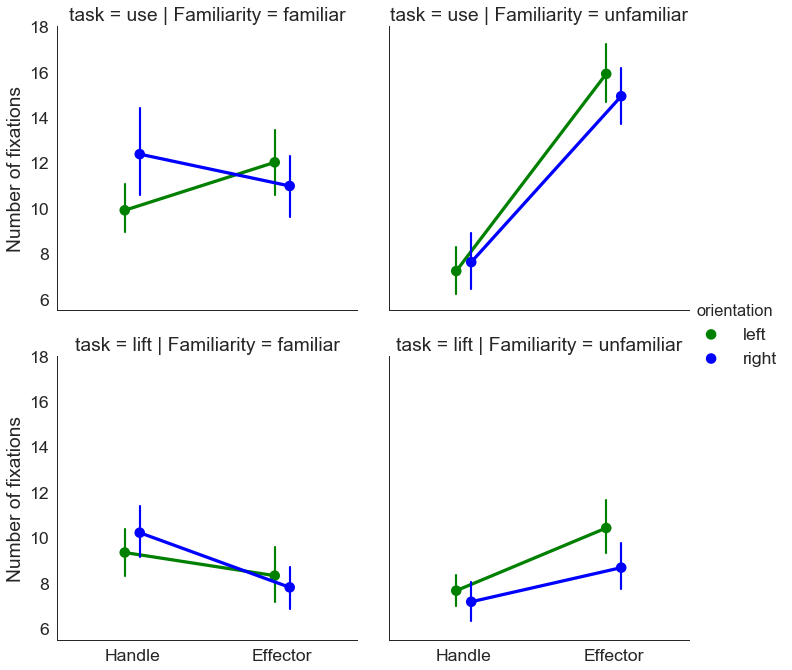

In [154]:
# tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
# tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 
#                                       'fix_duration'], keep='first')
# tmpdf = tmpdf.groupby(['subjectID','trialID','task',
#                        'orientation','Familiarity',
#                        'hitToolPart'],as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,legend = True, x = 'hitToolPart',
                 col = 'Familiarity', row ='task',y = 'isFix', 
                 kind = 'point', ci=95, scale=1.5, dodge=0.1,
                 order=['Handle','Effector'],hue = 'orientation',
                 palette=['green','blue'], hight=5, aspect=1)
)
plt.ylim(5.5,18)
g.set_axis_labels("", "Number of fixations")

plt.savefig(f'{RESULTS}/fixations_4WayInteraction_Poin.png',
            transparent=True, bbox_inches='tight', quality=90)

# g = (sns.catplot(data = tmpdf,legend = True, x = 'hitToolPart',
#                  y = 'isFix', col = 'Familiarity', row ='task',
#                  hue = 'orientation',order=['Handle','Effector'],
#                  kind = 'boxen',palette=['green','blue'], 
#                  height=5, aspect=1)
# )
# plt.ylim(0,50)
# g.set_axis_labels("", "Number of fixations")

# plt.savefig(f'{RESULTS}/fixations_4WayInteraction_Boxen.png',
#             transparent=True, bbox_inches='tight', quality=90)

### Interaction of factors *orientation* and *task*

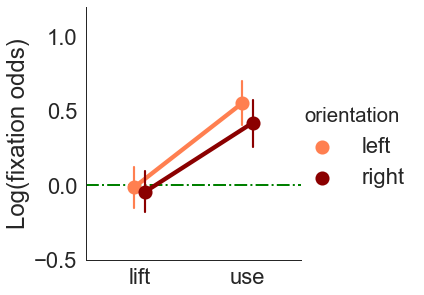

In [30]:
g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'task',
                 y = 'isFixLogOdds', kind = 'point', ci=95,
                 scale=2,dodge=0.1, order=['lift', 'use'],
                 hue = 'orientation', palette=['coral','darkred'],
                 height=5, aspect=1)
)
#plt.ylim(-0.3,0.8)
plt.ylim(-0.5,1.2)

g.set_axis_labels("", "Log(fixation odds)")

plt.axhline(y=0, ls='-.', color='green', lw=2, zorder=0.1)

# plt.savefig(f'{RESULTS}/OddsInteraction_Orientation_Task.png',transparent=True,
#              bbox_inches='tight', quality=90)

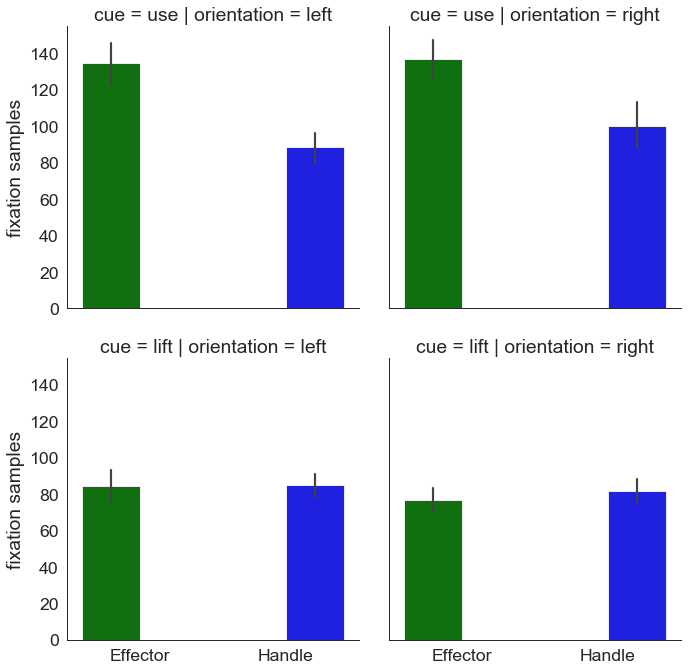

In [18]:
g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'hitToolPart', col = 'orientation', row ='cue',
                 y = 'isFix', kind = 'bar',
                 hue = 'hitToolPart',palette=sns.color_palette(['green', 'blue']))
)
g.set_axis_labels("", "fixation samples")
plt.savefig(f'{PLOT_PATH}/results/fixations_interaction_orientation_use.png',
            transparent=True, bbox_inches='tight', quality=90)

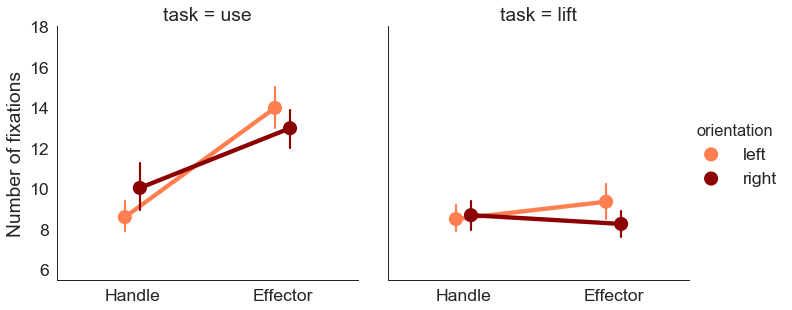

In [152]:
# tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
# tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
# tmpdf = tmpdf.groupby(['subjectID','trialID','orientation','task','hitToolPart'],as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'hitToolPart',
                 y = 'isFix',col='task', kind = 'point', ci=95,
                 scale=2,dodge=0.1, order=['Handle', 'Effector'],
                 hue = 'orientation', palette=['coral','darkred'],
                 height=5, aspect=1)
)
plt.ylim(5.5,18)
g.set_axis_labels("", "Number of fixations")

plt.savefig(f'{RESULTS}/fixations_interaction_orientation_cue_Point.png',
            transparent=True, bbox_inches='tight', quality=90)

### Interaction of factors *familiarity* and *orientation*

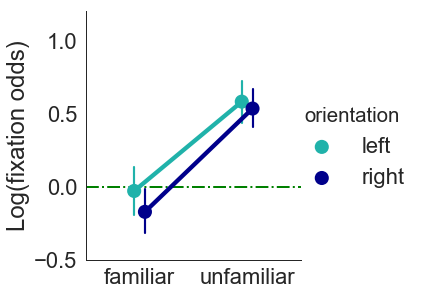

In [14]:
g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'Familiarity',
                 y = 'isFixLogOdds', kind = 'point', ci=95,
                 scale=2,dodge=0.1, order=['familiar', 'unfamiliar'],
                 hue = 'orientation', palette=['lightseagreen','darkblue'],
                 height=5, aspect=1)
)
#plt.ylim(-0.3,0.8)
plt.ylim(-0.5,1.2)
g.set_axis_labels("", "Log(fixation odds)")

plt.axhline(y=0, ls='-.', color='green', lw=2, zorder=0.1)

plt.savefig(f'{RESULTS}/OddsInteraction_Familiarity_Orientation.png',transparent=True,
             bbox_inches='tight', quality=90)

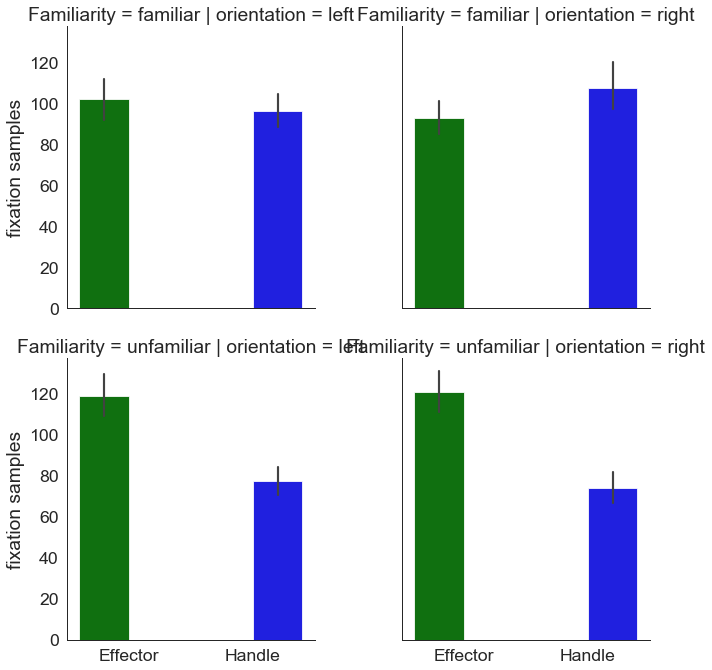

In [19]:
g = (sns.catplot(data = tmpdf, legend = True, x = 'hitToolPart', 
                 col = 'orientation', row ='Familiarity',
                 y = 'isFix', kind = 'bar',
                 hue = 'hitToolPart',palette=sns.color_palette(['green', 'blue']))
)
g.set_axis_labels("", "fixation samples")
plt.savefig(f'{PLOT_PATH}/results/fixations_interaction_familiarity_orientation.png',
            transparent=True, bbox_inches='tight', quality=90)

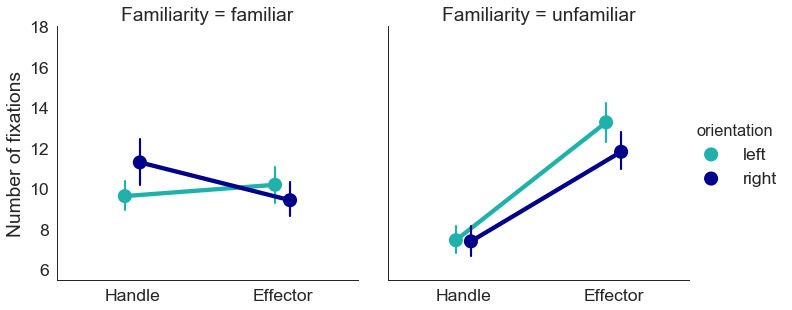

In [153]:
# tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')
# tmpdf = tmpdf.drop_duplicates(subset=['subjectID', 'trialID', 'isFix', 'fix_duration'], keep='first')
# tmpdf = tmpdf.groupby(['subjectID','trialID','orientation','Familiarity','hitToolPart'],as_index=False)['isFix'].count()

g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'hitToolPart',
                 y = 'isFix',col='Familiarity', kind = 'point', ci=95,
                 scale=2,dodge=0.1, order=['Handle', 'Effector'],
                 hue = 'orientation', palette=['lightseagreen','darkblue'],
                 height=5, aspect=1)
)
plt.ylim(5.5,18)
g.set_axis_labels("", "Number of fixations")

plt.savefig(f'{RESULTS}/fixations_interaction_orientation_Familiarity_Point.png',
            transparent=True, bbox_inches='tight', quality=90)

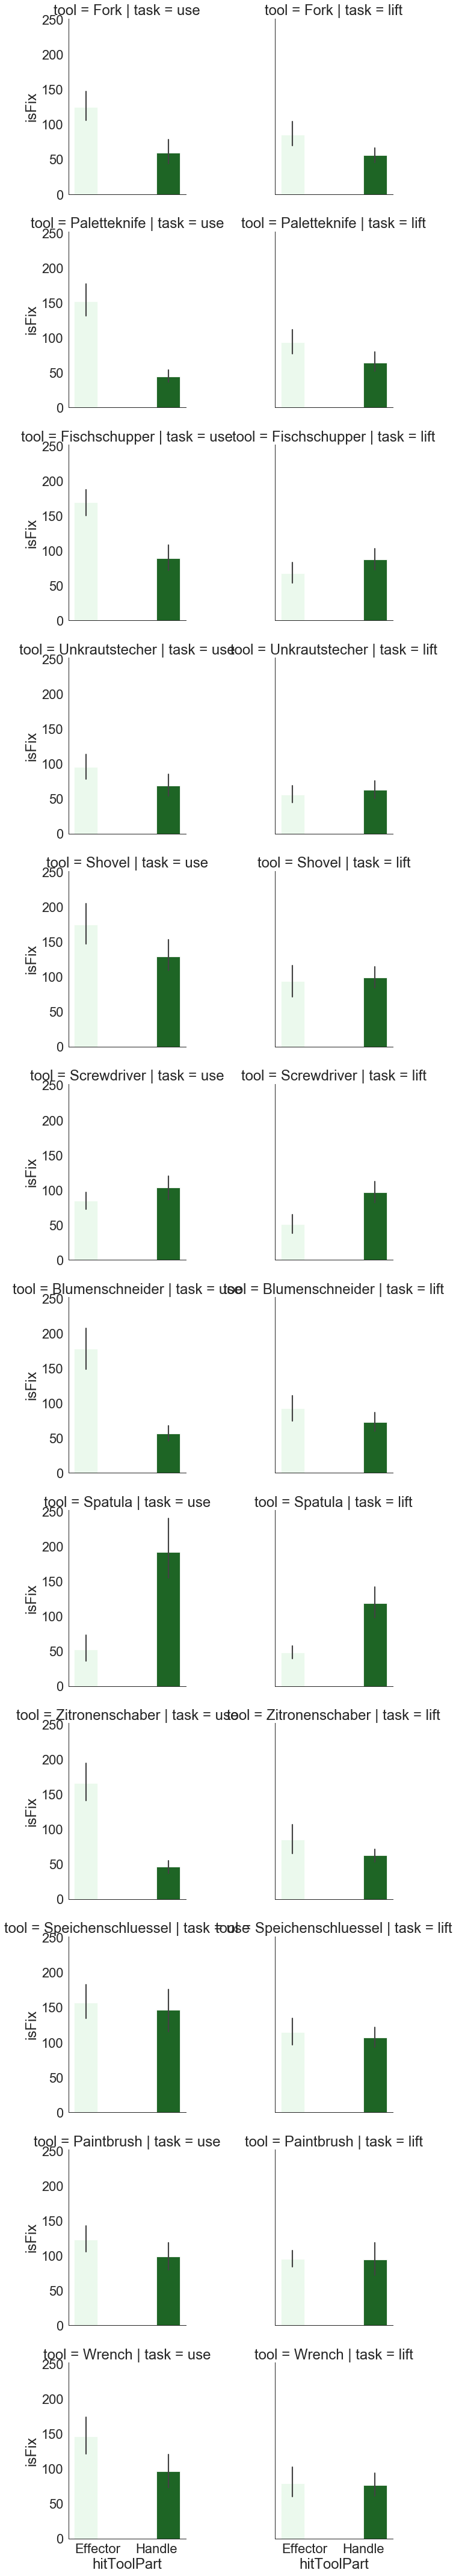

In [35]:
tmpdf = samples_df.query('isFix == 1 and isOutlierFix==0 and fix_duration!=0')

tmpdf = tmpdf.groupby(['subjectID','trialID','task','tool','hitToolPart'],as_index=False)['isFix'].count()
g = (sns.catplot(data = tmpdf,
                 legend = True, x = 'hitToolPart', row = 'tool', col ='task',
                 y = 'isFix', kind = 'bar',
                 hue = 'hitToolPart',color='g')
)

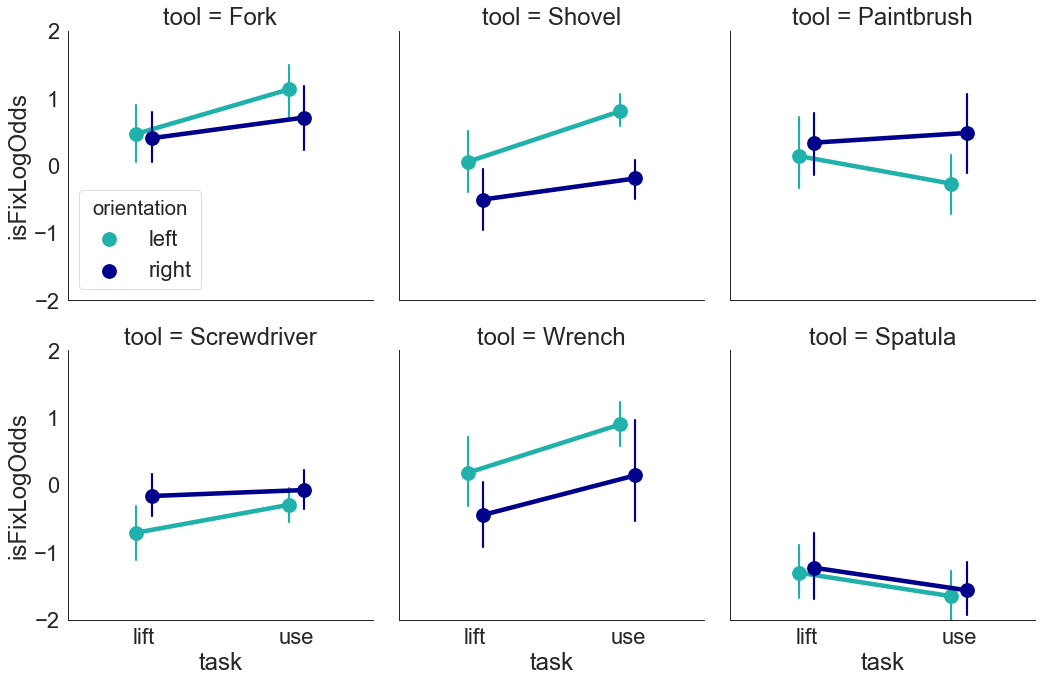

In [54]:
sns.set(style="white", palette="dark",font_scale=2.5, context = 'paper')

tmpdf1 = tmpdf.query('Familiarity == "familiar"')

g = (sns.catplot(data = tmpdf1,legend = True, x = 'task', 
                 col = 'tool', col_wrap = 3,
                 y = 'isFixLogOdds', 
                 kind = 'point', ci=95, scale=2.1, dodge=0.1,
                 hue = 'orientation', order = ['lift','use'],
                 palette=['lightseagreen','darkblue'], 
                 hight=3, aspect=1, zorder=0.2, legend_out=False)
)
plt.ylim(-2,2)

plt.savefig(f'{RESULTS}/ToolwiseFamiliar.png',
            transparent=True, bbox_inches='tight', quality=90)

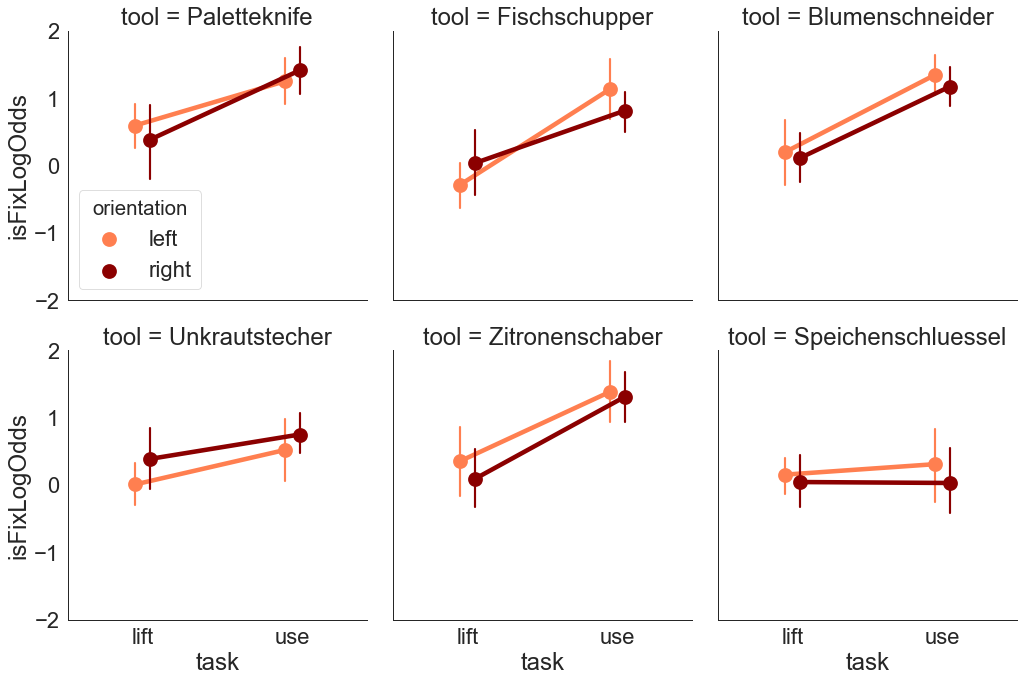

In [52]:
tmpdf1 = tmpdf.query('Familiarity == "unfamiliar"')

g = (sns.catplot(data = tmpdf1,legend = True, x = 'task', 
                 col = 'tool', col_wrap = 3,
                 y = 'isFixLogOdds', 
                 kind = 'point', ci=95, scale=2.1, dodge=0.1,
                 hue = 'orientation', order = ['lift','use'],
                 palette=['coral','darkred'], 
                 hight=3, aspect=1, zorder=0.2, legend_out=False)
)

plt.ylim(-2,2)
#plt.axhline(y=0, ls='-.', color='green', lw=2, zorder=0.1)

plt.savefig(f'{RESULTS}/ToolwiseUnamiliar.png',
            transparent=True, bbox_inches='tight', quality=90)

In [14]:
display(tmpdf.Familiarity.unique())

array(['familiar', 'unfamiliar'], dtype=object)

In [27]:
#samples_df.columns
samples_df['fixDistanceFromCenter'] = samples_df.hitPointOnObject_x - samples_df.hitObjectCenterInWorld_x


In [29]:
samples_df.groupby(['hitObjectName','hitToolPart'])['fixDistanceFromCenter'].mean()

hitObjectName                    hitToolPart
BlumenschneiderLeftEffector      Effector       0.241344
BlumenschneiderLeftHandle        Handle         0.307449
FischschupperLeftEffector        Effector       0.121535
FischschupperLeftHandle          Handle         0.305707
ForkLeftEffector                 Effector       0.583460
ForkLeftHandle                   Handle         0.293348
ForkRightEffector                Effector       0.249675
ForkRightHandle                  Handle         0.169209
PaintbrushLeftEffector           Effector       0.542246
PaintbrushLeftHandle             Handle         0.347362
PaletteknifeLeftEffector         Effector       0.276084
PaletteknifeLeftHandle           Handle         0.255865
ScrewdriverLeftEffector          Effector       0.106799
ScrewdriverLeftHandle            Handle         0.201044
ScrewdriverRightEffector         Effector      -0.219882
ScrewdriverRightHandle           Handle         0.137969
ShovelLeftEffector               Effector  

In [149]:
samples_df.groupby(['cue','hitToolPart'])['isFix'].count()
#samples_df.groupby(['orientation','hitToolPart'])['isFix'].count()
#samples_df.groupby(['Familiarity','hitToolPart'])['isFix'].count()

cue   hitToolPart
lift  Effector       53611
      Handle         57166
use   Effector       89316
      Handle         63398
Name: isFix, dtype: int64